In [16]:
import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import pandas as pd

import covid
import covid.util as util

# Load Data and Set Parameters

In [17]:
data = util.load_state_data()
place = 'MA'
start = '2020-03-04'
end = '2020-04-15'
save = True
num_warmup = 100
num_samples = 100
num_chains = 1
num_prior_samples = 100
T_future = 30

In [ ]:
import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro
from numpyro.infer import MCMC, NUTS, Predictive

import covid.models.SEIRD

N = data[place]['pop']
place_data = data[place]['data'][start:end]
T = len(place_data)

model = covid.models.SEIRD.SEIRD(
    data=place_data,
    N = data[place]['pop'],
    T = T
)

mcmc_samples = model.infer(num_warmup=num_warmup, 
                           num_samples=num_samples)

# Prior samples
prior_samples = model.prior(num_samples=num_prior_samples)

# In-sample posterior predictive samples (don't condition on observations)
print(" * collecting predictive samples")
post_pred_samples = model.predictive()

# Forecasting posterior predictive (do condition on observations)
print(" * collecting forecast samples")
forecast_samples = model.forecast(T_future=T_future)

 * running MCMC


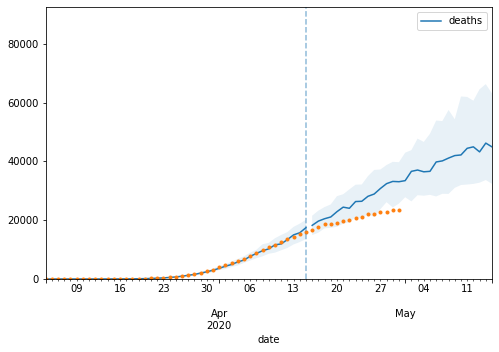

In [14]:
place = 'NY'
start = '2020-03-04'
end = '2020-04-15'
T_future = 30
legend=True
ax = None
plot_fields = ['z']

confirmed = data[place]['data'].confirmed[start:]
death = data[place]['data'].death[start:]

fig, ax = plt.subplots(figsize=(8,5))

# Plot posterior predictive
t = pd.date_range(start=start, end=confirmed.index.max(), freq="D")
model.plot_samples(post_pred_samples, ax=ax, t=t, plot_fields=['z'])

# Plot forecast predictive
forecast_start = pd.to_datetime(end) + pd.Timedelta("1d")
t_forecast = pd.date_range(start=forecast_start, periods=T_future, freq="1d")
med, _ = model.plot_samples(forecast_samples, 
                            ax=ax, 
                            t=t_forecast, 
                            legend=False, 
                            plot_fields=['z'],
                            forecast=True)

# Plot observed
#confirmed.plot(style='.')
death.plot(style='.')
ax.axvline(end, linestyle='--', alpha=0.5)
#ax.set_yscale('log')
ax.set_ylim([0, 2*med.max()])
plt.show()

# Compute error
# cum/incident confirmed/death
#

In [ ]:
## Validation: can only do cumulative for now...

# cumulative deaths 
start = forecast_start
end = death.index.max()

obs = death[start:end]

field = 'z_future'


T = len(obs)
df = pd.DataFrame(index=obs.index, data=samples[field][:,:T].T)

point_forecast = df.median(axis=1)
err = (point_forecast - obs).rename('err')
err.plot(style='o')

mae = err.abs().mean()

plt.title(f"{place} MAE={mae:.2f}")
plt.show()

#display(df[0]-actual)
# T_obs = len(actual)
# pred = np.median(forecast_samples['z_future'][:,:T_obs], axis=0)

# err_c = np.abs(pred-actual)
# plt.plot(pred, actual, 'o')
# plt.show()

In [ ]:

prob_model.set_data()
prob_model()  # __call__
prob_model.deaths(samples, forecast=True, daily=True)
prob_model.cases(samples, forecast=True, daily=True)

prob_model.get(samples, 'S')




deaths = prob_model.cumulative_deaths(samples)

In [ ]:

class foo():
    
    def __init__(self, a):
        self.a = a
        
        
    def __call__(self):
        print(self.a)
        
f = foo(1)
f()


In [9]:
d1 = {'a': 1, 'b': 2}
d2 = {'a': 100, 'c': 3}
d3 = {'d': 4}

d = dict(d2, **d1, **d3)

print(d)

{'a': 1, 'c': 3, 'b': 2, 'd': 4}
